In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import KDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import umap

In [ ]:

def Analysis(sample, ROI):
    cell_path = 'data/' + sample + ' ' + ROI + '/SegmentedCells.csv'

    DS = pd.read_csv(cell_path)

    Hoechst = DS.filter(regex='Intensity_IntegratedIntensity_Hoechst')

    fivehmc = DS.filter(regex='Intensity_IntegratedIntensity_fivehmc')

    fivemc = DS.filter(regex='Intensity_IntegratedIntensity_fivemc')


    # Another folder
    name = ["aSMA", "Calponin", "Fibronectin","PanCyto", "VCAM"]
    stroma_path = []
    for i in range(len(name)):
        stroma_path.append('data/Pixel classification/' + sample + '/' + ROI + '/rest/' + name[i] + 'IdentifyPrimaryObjects.csv')

    aSMA = pd.read_csv(stroma_path[0])
    Calponin = pd.read_csv(stroma_path[1])
    Fibronectin = pd.read_csv(stroma_path[2])
    PanCyto = pd.read_csv(stroma_path[3])
    VCAM = pd.read_csv(stroma_path[4])
    Collagen = pd.read_csv('data/Pixel classification/' + sample + '/' + ROI + '/IdentifyPrimaryObjects.csv')


    smax = aSMA.filter(regex='Intensity_IntegratedIntensity_cell')

    calpoX = Calponin.filter(regex='Intensity_IntegratedIntensity_cell')

    fibrox = Fibronectin.filter(regex='Intensity_IntegratedIntensity_cell')

    panx = PanCyto.filter(regex='Intensity_IntegratedIntensity_cell')

    VCAMX = VCAM.filter(regex='Intensity_IntegratedIntensity_cell')

    collagenx = Collagen.filter(regex='Intensity_IntegratedIntensity_try')


    # Put them all together
    collagenx['name'] = 1
    collagenx = collagenx.rename(columns={"Intensity_IntegratedIntensity_try": "Intensity"})

    fibrox['name'] = 2
    fibrox = fibrox.rename(columns={"Intensity_IntegratedIntensity_cell": "Intensity"})

    Hoechst['name'] = 3
    Hoechst = Hoechst.rename(columns={"Intensity_IntegratedIntensity_Hoechst": "Intensity"})

    panx['name'] = 4
    panx = panx.rename(columns={"Intensity_IntegratedIntensity_cell": "Intensity"})

    smax['name'] = 5
    smax = smax.rename(columns={"Intensity_IntegratedIntensity_cell": "Intensity"})

    fivehmc['name'] = 6
    fivehmc = fivehmc.rename(columns={"Intensity_IntegratedIntensity_fivehmc": "Intensity"})

    fivemc['name'] = 7
    fivemc = fivemc.rename(columns={"Intensity_IntegratedIntensity_fivemc": "Intensity"})

    calpoX['name'] = 8
    calpoX = calpoX.rename(columns={"Intensity_IntegratedIntensity_cell": "Intensity"})

    VCAMX['name'] = 9
    VCAMX = VCAMX.rename(columns={"Intensity_IntegratedIntensity_cell": "Intensity"})


    new = pd.concat([collagenx, fibrox, Hoechst,  panx, smax, fivehmc, fivemc, calpoX, VCAMX])
    # new = new.dropna()
    return new

In [ ]:

def space(sample, ROI):
    cell_path = 'data/' + sample + ' ' + ROI + '/SegmentedCells.csv'

    DS = pd.read_csv(cell_path)

    xCoord = DS.filter(regex='Location_CenterMassIntensity_X')
    yCoord = DS.filter(regex='Location_CenterMassIntensity_Y')

    Hox = xCoord.filter(regex='Hoechst')
    Hoy = yCoord.filter(regex='Hoechst')

    fivehmcx = xCoord.filter(regex='fivehmc')
    fivehmcy = yCoord.filter(regex='fivehmc')

    fivemcx = xCoord.filter(regex='fivemc')
    fivemcy = yCoord.filter(regex='fivemc')

    fivemc = DS.filter(regex='Intensity_IntegratedIntensity_fivemc')
    fivemc = fivemc/fivemc.max()
    # fivemc.loc[fivemc['Intensity_IntegratedIntensity_fivemc'] > 0.2, 'Intensity_IntegratedIntensity_fivemc'] = 0
    fivemc.loc[fivemc['Intensity_IntegratedIntensity_fivemc'] < 0.7, 'Intensity_IntegratedIntensity_fivemc'] = 0
    

    fivemcx.loc[fivemc['Intensity_IntegratedIntensity_fivemc'] == 0, 'Location_CenterMassIntensity_X_fivemc'] = None
    fivemcy.loc[fivemc['Intensity_IntegratedIntensity_fivemc'] == 0, 'Location_CenterMassIntensity_Y_fivemc'] = None


    # Another folder
    name = ["aSMA", "Calponin", "Fibronectin","PanCyto", "VCAM"]
    stroma_path = []
    for i in range(len(name)):
        stroma_path.append('data/Pixel classification/' + sample + '/' + ROI + '/rest/' + name[i] + 'IdentifyPrimaryObjects.csv')

    aSMA = pd.read_csv(stroma_path[0])
    Calponin = pd.read_csv(stroma_path[1])
    Fibronectin = pd.read_csv(stroma_path[2])
    PanCyto = pd.read_csv(stroma_path[3])
    VCAM = pd.read_csv(stroma_path[4])
    Collagen = pd.read_csv('data/Pixel classification/' + sample + '/' + ROI + '/IdentifyPrimaryObjects.csv')


    smax = aSMA.filter(regex='Location_CenterMassIntensity_X_cell')
    smay = aSMA.filter(regex='Location_CenterMassIntensity_Y_cell')

    calpoX = Calponin.filter(regex='Location_CenterMassIntensity_X_cell')
    calpoY = Calponin.filter(regex='Location_CenterMassIntensity_Y_cell')

    fibrox = Fibronectin.filter(regex='Location_CenterMassIntensity_X_cell')
    fibroy = Fibronectin.filter(regex='Location_CenterMassIntensity_Y_cell')

    panx = PanCyto.filter(regex='Location_CenterMassIntensity_X_cell')
    pany = PanCyto.filter(regex='Location_CenterMassIntensity_Y_cell')

    VCAMX = VCAM.filter(regex='Location_CenterMassIntensity_X_cell')
    VCAMY = VCAM.filter(regex='Location_CenterMassIntensity_Y_cell')

    collagenx = Collagen.filter(regex='Location_CenterMassIntensity_X_try')
    collageny = Collagen.filter(regex='Location_CenterMassIntensity_Y_try')


    # Put them all together
    col = pd.concat([collagenx,collageny], axis=1)
    col['name'] = 1
    col = col.rename(columns={"Location_CenterMassIntensity_X_try": "X", "Location_CenterMassIntensity_Y_try": "Y"})

    fibro = pd.concat([fibrox,fibroy], axis=1)
    fibro['name'] = 2
    fibro = fibro.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    hoechst = pd.concat([Hox,Hoy], axis=1)
    hoechst['name'] = 3
    hoechst = hoechst.rename(columns={"Location_CenterMassIntensity_X_Hoechst": "X", "Location_CenterMassIntensity_Y_Hoechst": "Y"})

    pancyto = pd.concat([panx,pany], axis=1)
    pancyto['name'] = 4
    pancyto = pancyto.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    asma = pd.concat([smax,smay], axis=1)
    asma['name'] = 5
    asma = asma.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    fivehmc = pd.concat([fivehmcx,fivehmcy], axis=1)
    fivehmc['name'] = 6
    fivehmc = fivehmc.rename(columns={"Location_CenterMassIntensity_X_fivehmc": "X", "Location_CenterMassIntensity_Y_fivehmc": "Y"})

    fivemc = pd.concat([fivemcx,fivemcy], axis=1)
    fivemc['name'] = 7
    fivemc = fivemc.rename(columns={"Location_CenterMassIntensity_X_fivemc": "X", "Location_CenterMassIntensity_Y_fivemc": "Y"})

    calponin = pd.concat([calpoX,calpoY], axis=1)
    calponin['name'] = 8
    calponin = calponin.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    VCAM = pd.concat([VCAMX,VCAMY], axis=1)
    VCAM['name'] = 9
    VCAM = VCAM.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})


    new = pd.concat([col, fibro, hoechst,  pancyto, asma, fivehmc, fivemc, calponin, VCAM])
    
    new = new.dropna()
    return new


In [4]:
def draw(sample, ROI):
    # fig,ax = plt.subplots(10,10, figsize = (20,15))
    Arranged = space(sample, ROI)
    Heatmap = np.zeros((9, 9))
    for x in range(1,10):
        for y in range(1,10):
            kd_tree1 = KDTree(Arranged[Arranged['name'] == x][['X', 'Y']])
            kd_tree2 = KDTree(Arranged[Arranged['name'] == y][['X', 'Y']])
            indexes = kd_tree1.query_ball_tree(kd_tree2, r=50)
            CellIndex = np.linspace(1,len(indexes),len(indexes))
            length = []

            for i in range(0,len(indexes)):
                length.append(len(indexes[i]))

            length = np.transpose(length)
            
            # ax[x-1,y-1].bar(CellIndex, length)
            # ax[x-1,y-1].set_ylabel(len(indexes))
            # ax[x-1,y-1].set_ylim(0,20)
            # ax[x-1,y-1].set_title("Name"+str(x)+"vs."+"Name"+str(y))
            Heatmap[x-1][y-1] = np.mean(length)
    return Heatmap

In [5]:
def KNN(sample, ROI):
    testdata = space(sample, ROI)
    # fig,ax = plt.subplots(10,10, figsize = (20,15))
    heatmap = np.zeros((9, 9))
    for x in range(1,10):
        for y in range(1,10):
            marker1 = testdata[testdata['name'] == x][['X','Y']]
            marker2 = testdata[testdata['name'] == y][['X','Y']]

            neigh = NearestNeighbors(n_neighbors=4)
            neigh.fit(marker2)
            neigh_dist = neigh.kneighbors(marker1, return_distance=True)

            DistArray=[]
            for i in range(len(neigh_dist[0])):
                DistArray.append(np.mean(neigh_dist[0][i]))

            # plt.hist(DistArray, bins=20)
            # np.mean(DistArray)
            # ax[x-1,y-1].hist(DistArray, bins=20, density=True)
            # ax[x-1,y-1].set_ylabel(round(np.mean(DistArray), 2))
            heatmap[x-1][y-1] = np.mean(DistArray)
            # print("x=" + str(x))
            # print("y=" + str(y))
    return heatmap

In [6]:
# # Nearest Neighbor Distance
# heat1LR1 = KNN('1L', 'R1')
# heat1LR2 = KNN('1L', 'R2')
# heat1LR3 = KNN('1L', 'R3')
# heat1LR4 = KNN('1L', 'R4')

# heat7LR1 = KNN('7L', 'R1')
# heat7LR2 = KNN('7L', 'R2')
# heat7LR3 = KNN('7L', 'R3')

# heat11LR1 = KNN('11L', 'R1')
# heat11LR2 = KNN('11L', 'R1')
# heat11LR3 = KNN('11L', 'R1')
# heat11LR4 = KNN('11L', 'R1')

# heat17LR1 = KNN('17L', 'R1')
# heat17LR2 = KNN('17L', 'R2')
# heat17LR3 = KNN('17L', 'R3')
# heat17LR4 = KNN('17L', 'R4')

# of NN
heat1LR1 = draw('1L', 'R1')
heat1LR2 = draw('1L', 'R2')
heat1LR3 = draw('1L', 'R3')
heat1LR4 = draw('1L', 'R4')

heat7LR1 = draw('7L', 'R1')
heat7LR2 = draw('7L', 'R2')
heat7LR3 = draw('7L', 'R3')

heat11LR1 = draw('11L', 'R1')
heat11LR2 = draw('11L', 'R1')
heat11LR3 = draw('11L', 'R1')
heat11LR4 = draw('11L', 'R1')

heat17LR1 = draw('17L', 'R1')
heat17LR2 = draw('17L', 'R2')
heat17LR3 = draw('17L', 'R3')
heat17LR4 = draw('17L', 'R4')

marker = ["Collagen", "Fibronectin", "Hoechst", "PanCyto", "aSMA", "5hmc", "5mc", "Calponin", "VCAM"]

# fig,ax = plt.subplots(9,9, figsize = (40,30))
array5mc = np.empty((9,15))
array5hmc = np.empty((9,15))
arrayHoechst = np.empty((9,15))
x = 6 # 6 is 5mc
for y in range(0,9):
    # Marker Pair Mean and Standard Deviation
    array5mc[y,:] = [heat1LR1[x][y], heat1LR2[x][y], heat1LR3[x][y], heat1LR4[x][y], heat7LR1[x][y], heat7LR2[x][y], heat7LR3[x][y], heat11LR1[x][y], heat11LR2[x][y], heat11LR3[x][y], heat11LR4[x][y], heat17LR1[x][y], heat17LR2[x][y], heat17LR3[x][y], heat17LR4[x][y]]
x = 5 # 5 is 5hmc
for y in range(0,9):
    array5hmc[y,:] = [heat1LR1[x][y], heat1LR2[x][y], heat1LR3[x][y], heat1LR4[x][y], heat7LR1[x][y], heat7LR2[x][y], heat7LR3[x][y], heat11LR1[x][y], heat11LR2[x][y], heat11LR3[x][y], heat11LR4[x][y], heat17LR1[x][y], heat17LR2[x][y], heat17LR3[x][y], heat17LR4[x][y]]

# x = 2 # 2 is Hoechst
# for y in range(0,9):
#     arrayHoechst[y,:] = [heat1LR1[x][y], heat1LR2[x][y], heat1LR3[x][y], heat1LR4[x][y], heat7LR1[x][y], heat7LR2[x][y], heat7LR3[x][y], heat11LR1[x][y], heat11LR2[x][y], heat11LR3[x][y], heat11LR4[x][y], heat17LR1[x][y], heat17LR2[x][y], heat17LR3[x][y], heat17LR4[x][y]]

    # Sample data
    categories = ['1LR1', '1LR2', '1LR3', '1LR4', 
                    '7LR1', '7LR2', '7LR3', 
                    '11LR1', '11LR2', '11LR3', '11LR4', 
                    '17LR1', '17LR2', '17LR3', '17LR4']




[0.84615385 0.         0.36363636 1.96969697 4.         5.42857143
 3.         3.33333333 3.33333333 3.33333333 3.33333333 7.
 5.3125     4.69230769 5.2       ]


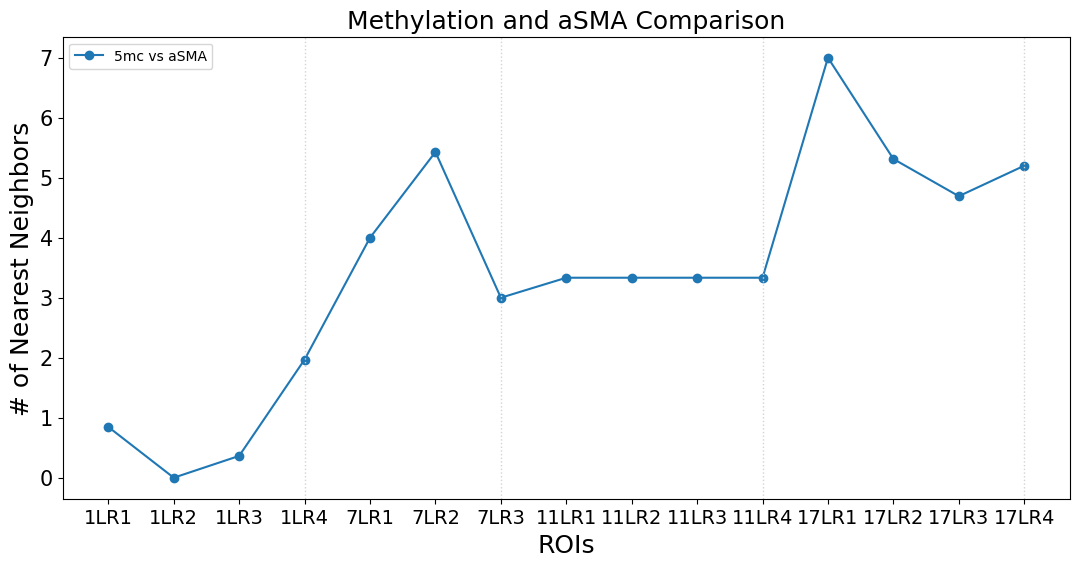

In [7]:

plt.figure(figsize = (13,6))
plt.plot(categories, array5mc[4,:], '-o', label='5mc vs aSMA')
# plt.plot(categories, array5hmc[4,:], '-o', label='5hmc vs aSMA')
plt.xlabel('ROIs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
# plt.ylim(0, 7.5)
plt.ylabel('# of Nearest Neighbors', fontsize=18)
plt.title('Methylation and aSMA Comparison', fontsize=18)
plt.legend()
for category in ['1LR4', '7LR3', '11LR4', '17LR4']:
    plt.axvline(x=category, color='lightgray', linestyle=':', linewidth=1)

print(array5mc[4,:])

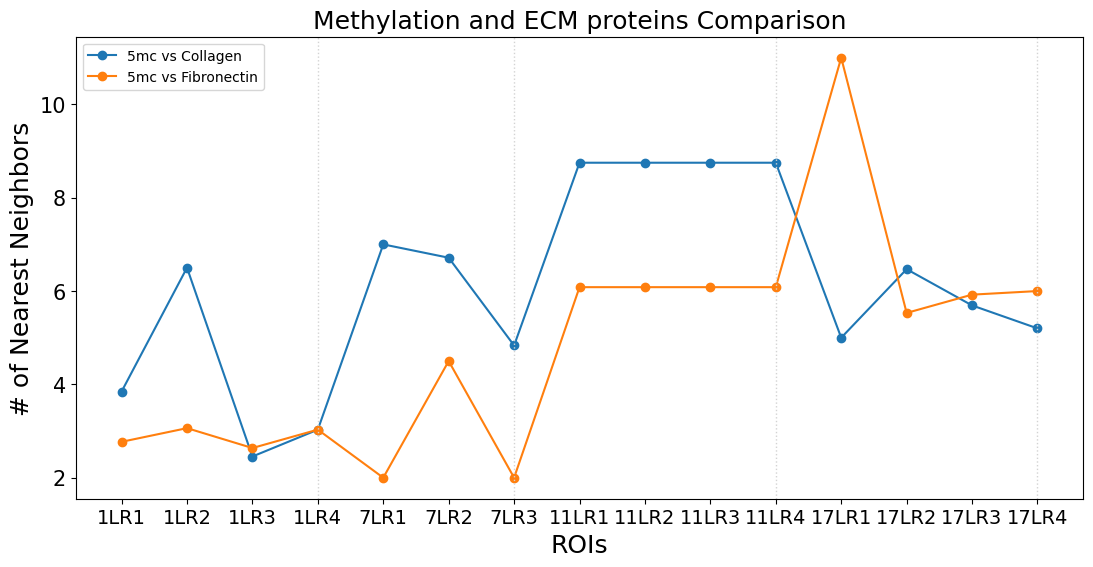

In [8]:
plt.figure(figsize = (13,6))
plt.plot(categories, array5mc[0,:], '-o', label='5mc vs Collagen')
# plt.plot(categories, array5hmc[0,:], '-o', label='5hmc vs Collagen')
plt.plot(categories, array5mc[1,:], '-o', label='5mc vs Fibronectin')
# plt.plot(categories, array5hmc[1,:], '-o', label='5hmc vs Fibronectin')
# plt.plot(categories, arrayHoechst[6,:], '-o', label='Hoechst vs 5mc')
# plt.plot(categories, arrayHoechst[5,:], '-o', label='Hoechst vs 5hmc')
plt.xlabel('ROIs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
# plt.ylim(0, 12)
plt.ylabel('# of Nearest Neighbors', fontsize=18)
plt.title('Methylation and ECM proteins Comparison', fontsize=18)
plt.legend()
for category in ['1LR4', '7LR3', '11LR4', '17LR4']:
    plt.axvline(x=category, color='lightgray', linestyle=':', linewidth=1)


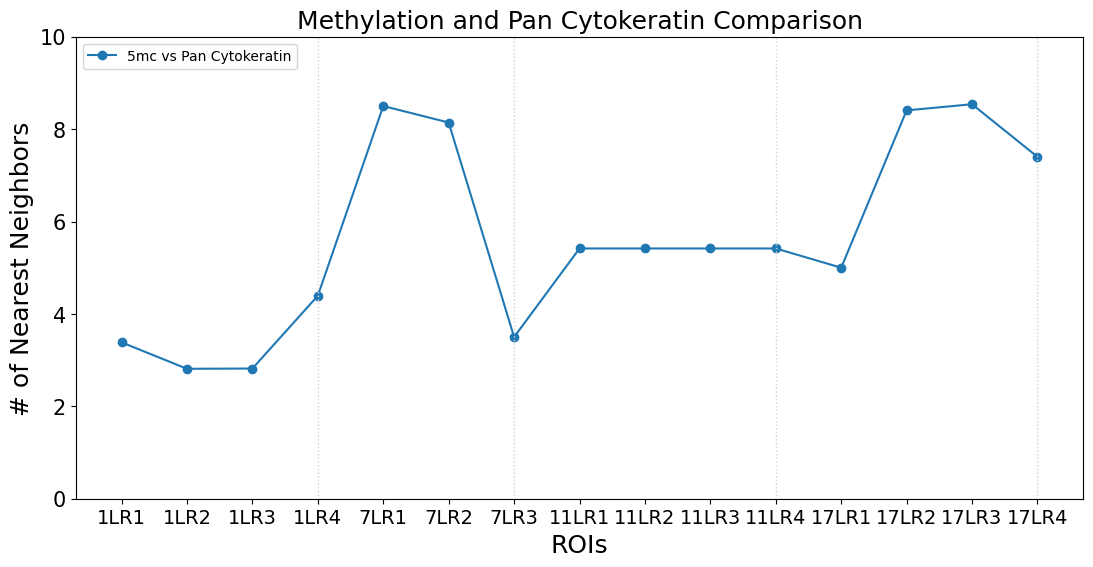

In [9]:
plt.figure(figsize = (13,6))
plt.plot(categories, array5mc[3,:], '-o', label='5mc vs Pan Cytokeratin')
# plt.plot(categories, array5hmc[3,:], '-o', label='5hmc vs Pan Cytokeratin')
# plt.plot(categories, arrayHoechst[6,:], '-o', label='Hoechst vs 5mc')
# plt.plot(categories, arrayHoechst[5,:], '-o', label='Hoechst vs 5hmc')
plt.xlabel('ROIs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.ylim(0, 10)
plt.ylabel('# of Nearest Neighbors', fontsize=18)
plt.title('Methylation and Pan Cytokeratin Comparison', fontsize=18)
plt.legend()
for category in ['1LR4', '7LR3', '11LR4', '17LR4']:
    plt.axvline(x=category, color='lightgray', linestyle=':', linewidth=1)

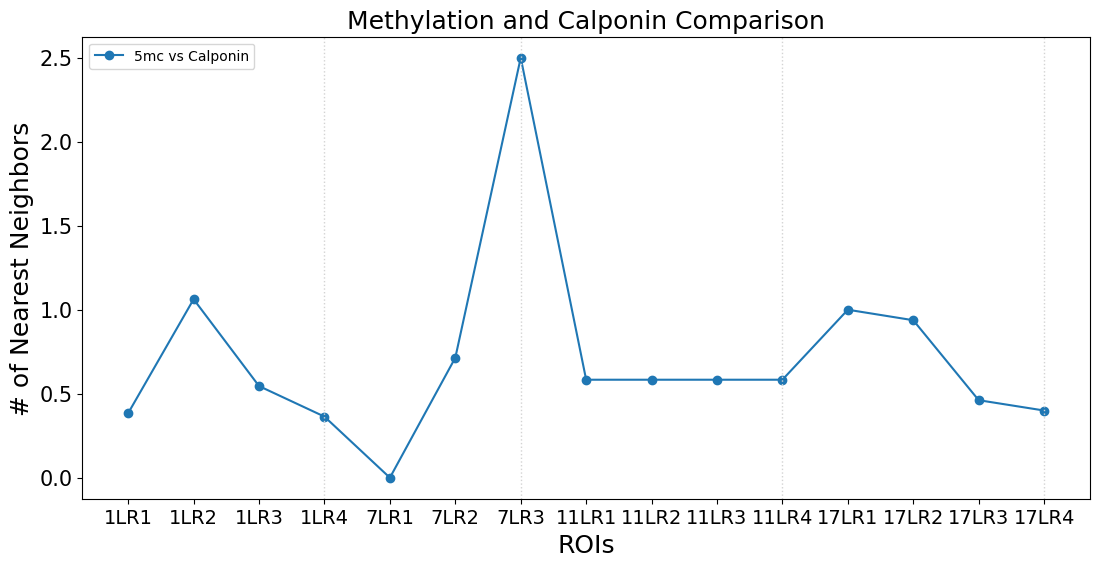

In [10]:
plt.figure(figsize = (13,6))
plt.plot(categories, array5mc[7,:], '-o', label='5mc vs Calponin')
# plt.plot(categories, array5hmc[7,:], '-o', label='5hmc vs Calponin')
# plt.plot(categories, arrayHoechst[6,:], '-o', label='Hoechst vs 5mc')
# plt.plot(categories, arrayHoechst[5,:], '-o', label='Hoechst vs 5hmc')
plt.xlabel('ROIs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
# plt.ylim(0, 3)
plt.ylabel('# of Nearest Neighbors', fontsize=18)
plt.title('Methylation and Calponin Comparison', fontsize=18)
plt.legend()
for category in ['1LR4', '7LR3', '11LR4', '17LR4']:
    plt.axvline(x=category, color='lightgray', linestyle=':', linewidth=1)

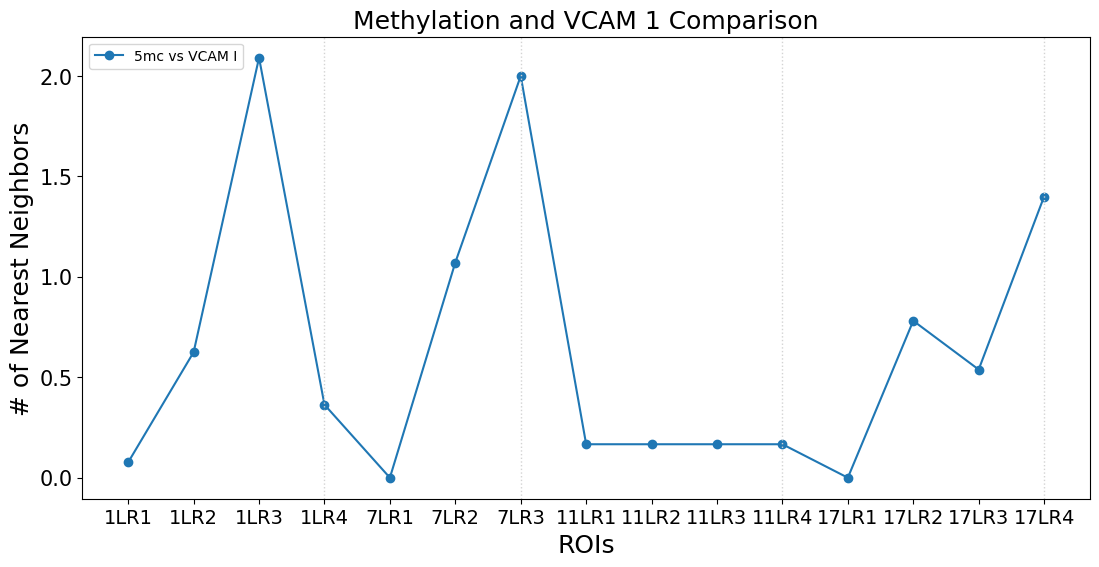

In [11]:
plt.figure(figsize = (13,6))
plt.plot(categories, array5mc[8,:], '-o', label='5mc vs VCAM I')
# plt.plot(categories, array5hmc[8,:], '-o', label='5hmc vs VCAM I')
# plt.plot(categories, arrayHoechst[6,:], '-o', label='Hoechst vs 5mc')
# plt.plot(categories, arrayHoechst[5,:], '-o', label='Hoechst vs 5hmc')
plt.xlabel('ROIs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
# plt.ylim(0, 3.5)
plt.ylabel('# of Nearest Neighbors', fontsize=18)
plt.title('Methylation and VCAM 1 Comparison', fontsize=18)
plt.legend()
for category in ['1LR4', '7LR3', '11LR4', '17LR4']:
    plt.axvline(x=category, color='lightgray', linestyle=':', linewidth=1)